In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [19]:
print("Gokulnaath M - 24BAD026")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






Gokulnaath M - 24BAD026


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
import kagglehub
from kagglehub import KaggleDatasetAdapter



In [22]:
df = pd.read_csv("/kaggle/input/calcofi/cast.csv")
print(df.head())


   Cst_Cnt          Cruise_ID  Cruise        Cruz_Sta  DbSta_ID  \
0        1  1949-03-01-C-31CR  194903  19490305400560   5400560   
1        2  1949-03-01-C-31CR  194903  19490305200750   5200750   
2        3  1949-03-01-C-31CR  194903  19490305100850   5100850   
3        4  1949-03-01-C-31CR  194903  19490305000950   5000950   
4        5  1949-03-01-C-31CR  194903  19490305001040   5001040   

                          Cast_ID       Sta_ID  Quarter Sta_Code  Distance  \
0  19-4903CR-HY-060-0930-05400560  054.0 056.0        1      NST       NaN   
1  19-4903CR-HY-060-2112-05200750  052.0 075.0        1      NST       NaN   
2  19-4903CR-HY-061-0354-05100850  051.0 085.0        1      NST       NaN   
3  19-4903CR-HY-061-1042-05000950  050.0 095.0        1      NST       NaN   
4  19-4903CR-HY-061-1706-05001040  050.0 104.0        1      NST       NaN   

   ... Wave_Prd  Wind_Dir  Wind_Spd  Barometer  Dry_T Wet_T  Wea  Cloud_Typ  \
0  ...      NaN      23.0      18.0        NaN   

/tmp/ipykernel_55/4277767090.py:1: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/calcofi/cast.csv")


In [23]:
features = ['Lat_Dec', 'Lon_Dec', 'Bottom_D']
target = 'Dry_T'

df = df[features + [target]]

In [24]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [25]:
X = df[features]
y = df[target]

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [31]:
print("\nLinear Regression Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


Linear Regression Performance
MSE : 3.6748014404014953
RMSE: 1.916977162201338
R²  : 0.08479369479916654


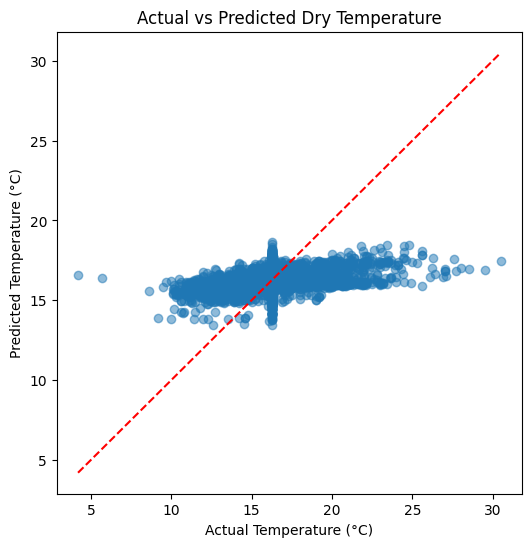

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Dry Temperature")
plt.show()

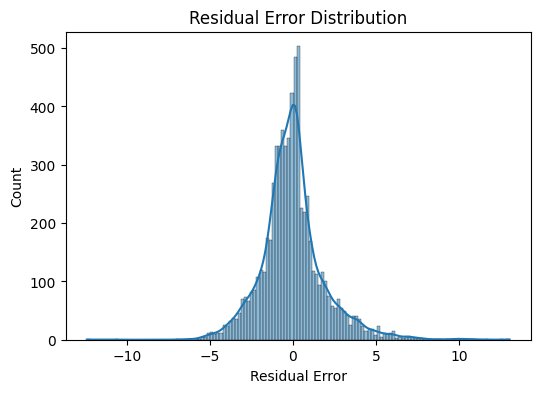

In [34]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual Error")
plt.title("Residual Error Distribution")
plt.show()


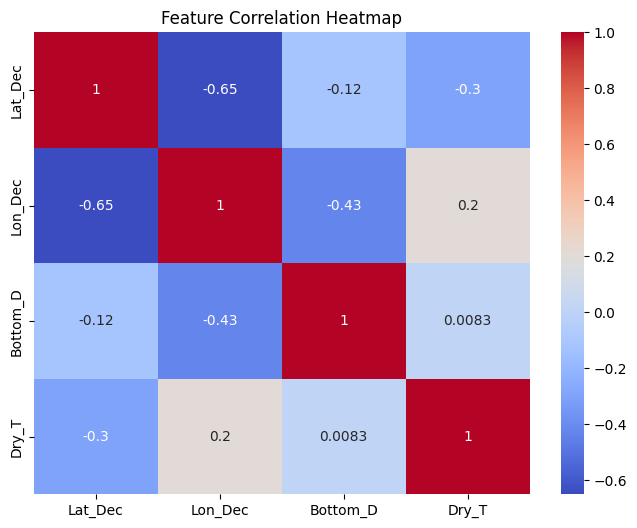

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R²:", r2_score(y_test, ridge_pred))


Ridge R²: 0.08479390371327222


In [37]:

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, lasso_pred))

Lasso R²: 0.08468909730175578
